# Neurons and Layers
We will explore the inner workings of neurons/units and layers. In particular, the file will draw parallels to the models you have mastered in the preivous 3 not books, the regression/linear model and the logistic model. We will start with  Tensorflow and demonstrate how these models are implemented in that framework. However we will code most of the functions by our own later on this following notbooks.
<figure>
   <img src="./resources/images/C2_W1_NeuronsAndLayers.png"  style="width:540px;height:200px;" >
</figure>


## Packages
**Tensorflow and Keras**  
Tensorflow is a machine learning package developed by Google. In 2019, Google integrated Keras into Tensorflow and released Tensorflow 2.0. Keras is a framework developed independently by François Chollet that creates a simple, layer-centric interface to Tensorflow. This course will be using the Keras interface. 

In [72]:
import numpy as np
import logging
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
plt.style.use('./resources/deeplearning.mplstyle')

from resources.lab_utils_common import dlc , sigmoid
from resources.lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic

logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

## Neuron without activation - Regression/Linear Model

### DataSet
We'll use an example from the first problem statment we had, linear regression on house prices.

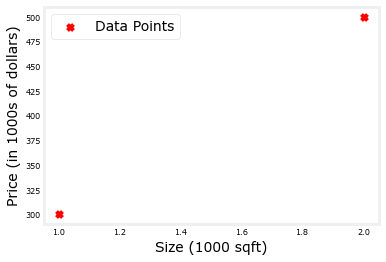

In [73]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

### Regression/Linear Model 
The function implemented by a neuron with no activation is the same as in first notbook, linear regression:
$$ f_{\mathbf{w},b}(x^{(i)}) = \mathbf{w}\cdot x^{(i)} + b \tag{1}$$



We can define a layer with one neuron or unit and compare it to the familiar linear regression function.

In [74]:
linear_layer = tf.keras.layers.Dense(units=1, activation = 'linear', )

Let's examine the weights.

In [75]:
linear_layer.get_weights()

[]

There are no weights as the weights are not yet instantiated. Let's try the model on one example in `X_train`. This will trigger the instantiation of the weights. Note, the input to the layer must be 2-D, so we'll reshape it.

In [76]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[1.71]], shape=(1, 1), dtype=float32)


The result is a tensor (another name for an array) with a shape of (1,1) or one entry.   
Now let's look at the weights and bias. These weights are randomly initialized to small numbers and the bias defaults to being initialized to zero.

In [77]:
w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[1.71]], b=[0.]


A linear regression model (1) with a single input feature will have a single weight and bias. This matches the dimensions of our `linear_layer` above.   

The weights are initialized to random values so let's set them to some known values.

In [78]:
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


Let's compare equation (1) to the layer output.

In [79]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


They produce the same values!
Now, we can use our linear layer to make predictions on our training data.

In [80]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, set_w) + set_b

In [81]:
# plt_linear(X_train, Y_train, prediction_tf, prediction_np)

## Neuron with Sigmoid activation
The function implemented by a neuron/unit with a sigmoid activation is the same as in Course 1, logistic  regression:
$$ f_{\mathbf{w},b}(x^{(i)}) = g(\mathbf{w}x^{(i)} + b) \tag{2}$$
where $$g(x) = sigmoid(x)$$ 

Let's set $w$ and $b$ to some known values and check the model.


### DataSet
We'll use same example from first nootbook, logistic regression.

In [82]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

In [83]:
pos = Y_train == 1
neg = Y_train == 0
X_train[pos]

array([3., 4., 5.], dtype=float32)

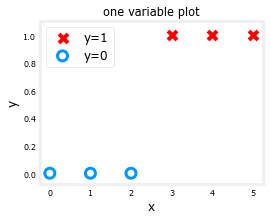

In [84]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors=dlc["dlblue"],lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

### Logistic Neuron
We can implement a 'logistic neuron' by adding a sigmoid activation. The function of the neuron is then described by (2) above.   
This section will create a Tensorflow Model that contains our logistic layer to demonstrate an alternate method of creating models. Tensorflow is most often used to create multi-layer models. The [Sequential](https://keras.io/guides/sequential_model/) model is a convenient means of constructing these models.

In [85]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

`model.summary()` shows the layers and number of parameters in the model. There is only one layer in this model and that layer has only one unit. The unit has two parameters, $w$ and $b$.

In [86]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [87]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[0.42]] [0.]
(1, 1) (1,)


Let's set the weight and bias to some known values. ( so we can follow with our own math)

In [88]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


Let's compare equation (2) to the layer output.

In [89]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = sigmoidnp(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(alog)

1/1 [==============================] - 0s 27ms/step
[[0.01]]
[[0.01]]


They produce the same values!
Now, we can use our logistic layer and NumPy model to make predictions on our training data.

1/1 [==============================] - 0s 13ms/step


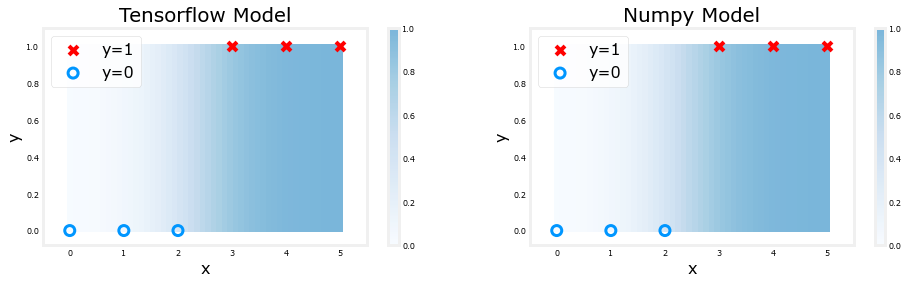

In [90]:
plt_logistic(X_train, Y_train, model, set_w, set_b, pos, neg)

The shading above reflects the output of the sigmoid which varies from 0 to 1.

# Simple Neural Network
In this step we will build a small neural network using Tensorflow. a bit more complicated, it is for coffee roasting, data is provided from open sources (Links provided).


Now we will implemt the same steps but using np library instead of TF

In [91]:


from resources.lab_utils_common import dlc, sigmoid
from resources.lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit



## DataSet

In [92]:
X,Y = load_coffee_data();
print(X.shape, Y.shape)
print(X)
print(X[: ,0])

(200, 2) (200, 1)
[[185.32  12.69]
 [259.92  11.87]
 [231.01  14.41]
 [175.37  11.72]
 [187.12  14.13]
 [225.91  12.1 ]
 [208.41  14.18]
 [207.08  14.03]
 [280.6   14.23]
 [202.87  12.25]
 [196.7   13.54]
 [270.31  14.6 ]
 [192.95  15.2 ]
 [213.57  14.28]
 [164.47  11.92]
 [177.26  15.04]
 [241.77  14.9 ]
 [237.    13.13]
 [219.74  13.87]
 [266.39  13.25]
 [270.45  13.95]
 [261.96  13.49]
 [243.49  12.86]
 [220.58  12.36]
 [163.59  11.65]
 [244.76  13.33]
 [271.19  14.84]
 [201.99  15.39]
 [229.93  14.56]
 [204.97  12.28]
 [173.19  12.22]
 [231.51  11.95]
 [152.69  14.83]
 [163.42  13.3 ]
 [215.95  13.98]
 [218.04  15.25]
 [251.3   13.8 ]
 [233.33  13.53]
 [280.24  12.41]
 [243.02  13.72]
 [155.67  12.68]
 [275.17  14.64]
 [151.73  12.69]
 [151.32  14.81]
 [164.9   11.73]
 [282.55  13.28]
 [192.98  11.7 ]
 [202.6   12.96]
 [220.67  11.53]
 [169.97  12.34]
 [209.47  12.71]
 [232.8   12.64]
 [272.8   15.35]
 [158.02  12.34]
 [226.01  14.58]
 [158.64  12.24]
 [211.66  14.17]
 [271.95  14.

Let's plot the coffee roasting data below. The two features are Temperature in Celsius and Duration in minutes. [Coffee Roasting at Home](https://www.merchantsofgreencoffee.com/how-to-roast-green-coffee-in-your-oven/) suggests that the duration is best kept between 12 and 15 minutes while the temp should be between 175 and 260 degrees Celsius. Of course, as temperature rises, the duration should shrink. 

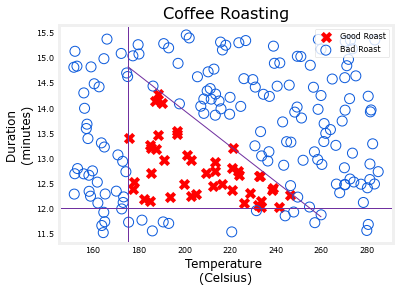

In [93]:
plt_roast(X,Y)

### Normalize Data
Fitting the weights to the data (back-propagation) will proceed more quickly if the data is normalized. This is the same procedure you used in first nootbook 1 where features in the data are each normalized to have a similar range. 
The procedure below uses a Keras [normalization layer](https://keras.io/api/layers/preprocessing_layers/numerical/normalization/). It has the following steps:
- create a "Normalization Layer". Note, as applied here, this is not a layer in your model.
- 'adapt' the data. This learns the mean and variance of the data set and saves the values internally.
- normalize the data.  
It is important to apply normalization to any future data that utilizes the learned model.

In [94]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


Tile/copy our data to increase the training set size and reduce the number of training epochs.

In [95]:
Xt = np.tile(Xn,(1000,1))
Yt= np.tile(Y,(1000,1))   
print(Xt.shape, Yt.shape)   

(200000, 2) (200000, 1)


In [97]:



from resources.lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit


## Tensorflow Model

### Model
   <center> <img  src="./resources/images/C2_W1_RoastingNetwork.PNG" width="200" />   <center/>  
Let's build the "Coffee Roasting Network" described in lecture. There are two layers with sigmoid activations as shown below:

In [98]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid', name = 'layer1'),
        Dense(1, activation='sigmoid', name = 'layer2')
     ]
)

>**Note 1:** The `tf.keras.Input(shape=(2,)),` specifies the expected shape of the input. This allows Tensorflow to size the weights and bias parameters at this point.  This is useful when exploring Tensorflow models. This statement can be omitted in practice and Tensorflow will size the network parameters when the input data is specified in the `model.fit` statement.  
>**Note 2:** Including the sigmoid activation in the final layer is not considered best practice. It would instead be accounted for in the loss which improves numerical stability. This will be described in more detail in a later lab.

The `model.summary()` provides a description of the network:

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

In [99]:
L1_num_params = 2 * 3 + 3   # W1 parameters  + b1 parameters
L2_num_params = 3 * 1 + 1   # W2 parameters  + b2 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params  )

L1 params =  9 , L2 params =  4


Let's examine the weights and biases Tensorflow has instantiated.  The weights $W$ should be of size (number of features in input, number of units in the layer) while the bias $b$ size should match the number of units in the layer:
- In the first layer with 3 units, we expect W to have a size of (2,3) and $b$ should have 3 elements.
- In the second layer with 1 unit, we expect W to have a size of (3,1) and $b$ should have 1 element.

In [100]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.08 -0.3   0.18]
 [-0.56 -0.15  0.89]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[-0.43]
 [-0.88]
 [ 0.36]] 
b2(1,): [0.]


The following statements will be described in detail in Week2. For now:
- The `model.compile` statement defines a loss function and specifies a compile optimization.
- The `model.fit` statement runs gradient descent and fits the weights to the data.

In [101]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,            
    epochs=10,
)

Epoch 1/10
6250/6250 [==============================] - 5s 687us/step - loss: 0.1782
Epoch 2/10
6250/6250 [==============================] - 4s 668us/step - loss: 0.1165
Epoch 3/10
6250/6250 [==============================] - 4s 656us/step - loss: 0.0426
Epoch 4/10
6250/6250 [==============================] - 4s 651us/step - loss: 0.0160
Epoch 5/10
6250/6250 [==============================] - 4s 654us/step - loss: 0.0104
Epoch 6/10
6250/6250 [==============================] - 4s 663us/step - loss: 0.0073
Epoch 7/10
6250/6250 [==============================] - 4s 686us/step - loss: 0.0052
Epoch 8/10
6250/6250 [==============================] - 4s 685us/step - loss: 0.0037
Epoch 9/10
6250/6250 [==============================] - 4s 689us/step - loss: 0.0027
Epoch 10/10
6250/6250 [==============================] - 4s 687us/step - loss: 0.0020


## Layer Functions
Let's examine the functions of the units to determine their role in the coffee roasting decision. We will plot the output of each node for all values of the inputs (duration,temp). Each unit is a logistic function whose output can range from zero to one. The shading in the graph represents the output value.
> Note: In labs we typically number things starting at zero while the lectures may start with 1.

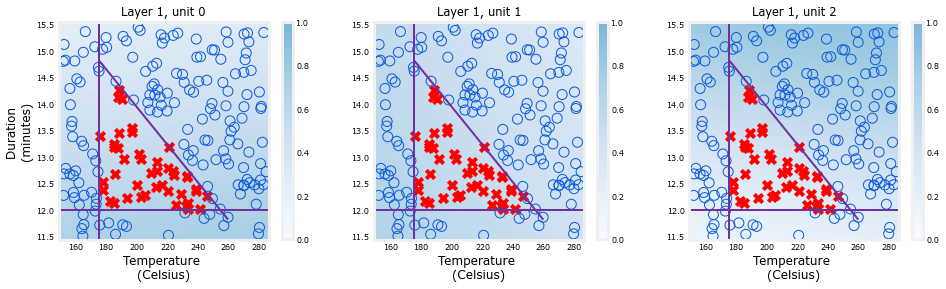

In [ ]:
plt_layer(X,Y.reshape(-1,),W1,b1,norm_l)

The shading shows that each unit is responsible for a different "bad roast" region. unit 0 has larger values when the temperature is too low. unit 1 has larger values when the duration is too short and unit 2 has larger values for bad combinations of time/temp. It is worth noting that the network learned these functions on its own through the process of gradient descent. They are very much the same sort of functions a person might choose to make the same decisions.

The function plot of the final layer is a bit more difficult to visualize. It's inputs are the output of the first layer. We know that the first layer uses sigmoids so their output range is between zero and one. We can create a 3-D plot that calculates the output for all possible combinations of the three inputs. This is shown below. Above, high output values correspond to 'bad roast' area's. Below, the maximum output is in area's where the three inputs are small values corresponding to 'good roast' area's.

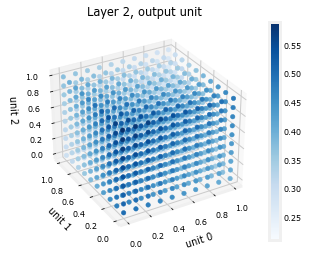

In [ ]:
plt_output_unit(W2,b2)

The final graph shows the whole network in action.  
The left graph is the raw output of the final layer represented by the blue shading. This is overlaid on the training data represented by the X's and O's.   
The right graph is the output of the network after a decision threshold. The X's and O's here correspond to decisions made by the network.  
The following takes a moment to run

7/7 [==============================] - 0s 665us/step


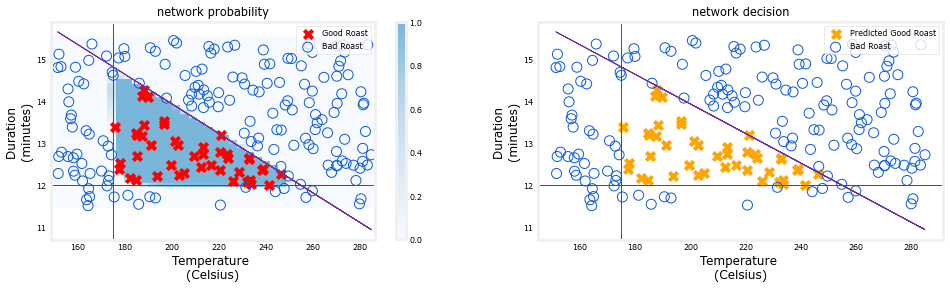

In [ ]:
netf= lambda x : model.predict(norm_l(x))
plt_network(X,Y,netf)